In [1]:
from sklearn.datasets import load_boston

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = load_boston()

In [20]:
df1 = pd.DataFrame(df.data)

In [21]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
df1.columns = df.feature_names

In [23]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
df1["Price"] = df.target

In [25]:
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [27]:
x = df1.iloc[:,0:-1]
y = df1.iloc[:,-1]

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [36]:
model = LinearRegression()
mse = cross_val_score(model, x, y, scoring = 'neg_mean_squared_error', cv = 5)
mse_mean = np.mean(mse)
print(mse_mean)

-37.131807467699055


# Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [42]:
ridge = Ridge()
parameters = { 'alpha':[1e-10, 1e-5, 1e-3, 1e-2, 1, 2, 3, 5, 7, 10, 20, 30, 40, 50, 55, 70, 85, 100]}
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5 )
ridge_reg.fit(x,y)
# mean_ridge_reg = np.mean(ridge_reg)
# print(mean_ridge_reg)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.01, 1, 2, 3, 5, 7, 10,
                                   20, 30, 40, 50, 55, 70, 85, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [44]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 100}
-29.905701947540344


# Ridge Regression

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [50]:
lasso = Lasso()
parameters = { 'alpha':[1e-10, 1e-5, 1e-3, 1e-2, 1, 2, 3, 5, 7, 10, 20, 30, 40, 50, 55, 70, 85, 100]}
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5 )
lasso_reg.fit(x,y)
# mean_ridge_reg = np.mean(ridge_reg)
# print(mean_ridge_reg)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-05, 0.001, 0.01, 1, 2, 3, 5, 7, 10,
                                   20, 30, 40, 50, 55, 70, 85, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [51]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1}
-35.531580220694856


In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state = 0)

In [68]:
prediction_lasso = lasso_reg.predict(x_test)
prediction_ridge = ridge_reg.predict(x_test)

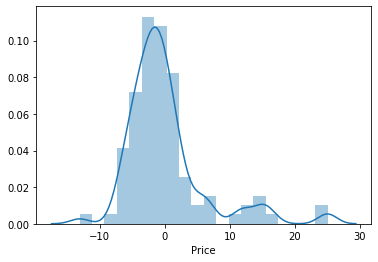

In [69]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

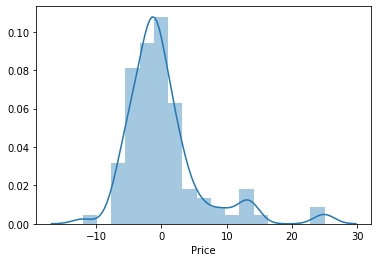

In [70]:
sns.distplot(y_test-prediction_ridge)